In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *

In [3]:
# Object and Earth parameters
coef = 0.5 # drag coefficient
x_area = 0.1 # m^2
mass = 100 # kg
rho = 1.225 # kg/m^3
g_vec = np.array([0, -9.8]) # m/s^3

# Set simulation parameters
sim_time = 1000 # duration
n_steps = 1000 # number of calculations
dt = sim_time/n_steps

In [4]:
def compute_trajectory(y0, vx0, m):
    t = np.zeros(n_steps + 1)
    r = np.zeros((n_steps + 1, 2))
    v = np.zeros((n_steps + 1, 2))

    r[0] = [0.0, y0]
    v[0] = [vx0, 0.0]

    impact_idx = None

    for i in range(n_steps):
        speed    = np.linalg.norm(v[i])
        drag_dir = -v[i]/speed if speed > 0 else np.array([0.0, 0.0])
        F_drag   = 0.5 * coef * x_area * speed**2 * drag_dir
        acc      = g_vec + F_drag / m

        t[i+1] = t[i] + dt
        r[i+1] = r[i] + v[i] * dt
        v[i+1] = v[i] + acc  * dt

        if r[i+1, 1] <= 0.0:
            r[i+1, 1] = 0.0
            impact_idx = i + 1
            break

    if impact_idx is None:
        impact_idx = n_steps

    impact_time = t[impact_idx]

    last = impact_idx + 1          # inclusive slice
    t, r, v = t[:last], r[:last], v[:last]

    print(f"Impact at t = {impact_time:.2f} s")
    return t, r, v, impact_time



In [16]:
t1, r1, v1, impact_time1 = compute_trajectory(10_000, 1000, 100)
t2, r2, v2, impact_time2 = compute_trajectory(10_000, 0, 100)

Impact at t = 71.00 s
Impact at t = 65.00 s


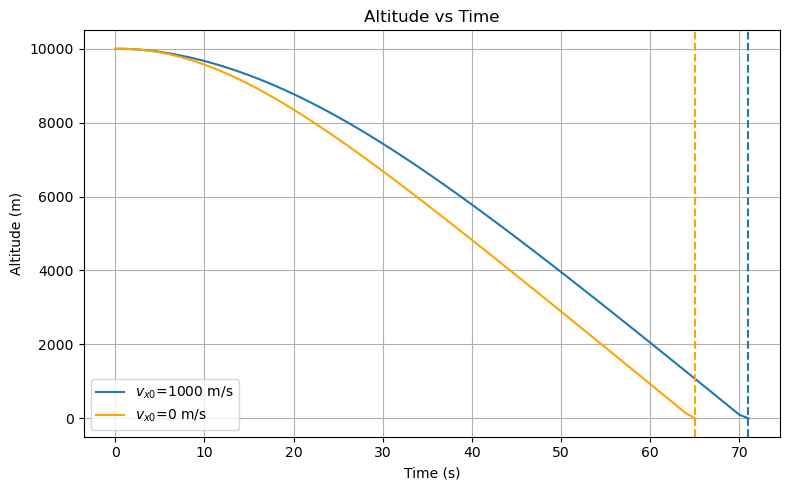

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(t1, r1[:, 1], label=r'$v_{x0}$=1000 m/s')
plt.plot(t2, r2[: ,1], label=r'$v_{x0}$=0 m/s', color='orange')
plt.axvline(impact_time1, linestyle='--')
plt.axvline(impact_time2, linestyle='--', color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.title("Altitude vs Time")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()
